<a href="https://colab.research.google.com/github/Benjamin2024/datascience/blob/main/low_bandwith_plant_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Plant Disease Diagnostic Using Mobile Technology


## Seeding for Reproducibility

In [2]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

## Importing the Dependencies

In [3]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

## Import Data from Kaggle

In [5]:
!pip install kaggle

In [6]:
kaggle_credentials = json.load(open('kaggle.json'))
os.environ['KAGGLE_USERNAME'] = kaggle_credentials['username']
os.environ['KAGGLE_KEY'] = kaggle_credentials['key']

In [7]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.04G/2.04G [00:11<00:00, 238MB/s]
100% 2.04G/2.04G [00:11<00:00, 193MB/s]


In [8]:
# Unzip the downloaded dataset
with ZipFile('plantvillage-dataset.zip', 'r') as zipObj:
  zipObj.extractall()

In [9]:
# All the files here are thesame except that the images are segmented, colored and in grayscale
print(os.listdir('plantvillage dataset'))

# All images in this folder are segmented (leaf images)
print(len(os.listdir('plantvillage dataset/segmented')))
print(os.listdir('plantvillage dataset/segmented')[:5])

# All images in this folder are present in color (rgb)
print(len(os.listdir('plantvillage dataset/color')))
print(os.listdir('plantvillage dataset/color')[:5])

# All images in this folder are present in grayscale (black & white)
print(len(os.listdir('plantvillage dataset/grayscale')))
print(os.listdir('plantvillage dataset/grayscale')[:5])

['segmented', 'grayscale', 'color']
38
['Apple___healthy', 'Cherry_(including_sour)___healthy', 'Tomato___Bacterial_spot', 'Blueberry___healthy', 'Strawberry___Leaf_scorch']
38
['Apple___healthy', 'Cherry_(including_sour)___healthy', 'Tomato___Bacterial_spot', 'Blueberry___healthy', 'Strawberry___Leaf_scorch']
38
['Apple___healthy', 'Cherry_(including_sour)___healthy', 'Tomato___Bacterial_spot', 'Blueberry___healthy', 'Strawberry___Leaf_scorch']


## Checking to examine the number of images in each folder

In [15]:
print(len(os.listdir('plantvillage dataset/color/Apple___healthy')))
print(os.listdir('plantvillage dataset/color/Apple___healthy')[:5])

1645
['f995325a-1135-4bde-89a6-121b0fde8c6c___RS_HL 5891.JPG', '828a6b50-e2fb-4e63-a595-556aa41d43a7___RS_HL 6250.JPG', '03152113-855b-4eab-8a4f-7d78d92240d0___RS_HL 5838.JPG', 'fa3dec4b-5fed-4ba4-808f-25b6b84c7c87___RS_HL 7525.JPG', '786696fd-ef1f-4e75-9ddd-250b628d9fe3___RS_HL 6199.JPG']


In [16]:
print(len(os.listdir('plantvillage dataset/color/Corn_(maize)___Common_rust_')))
print(os.listdir('plantvillage dataset/color/Corn_(maize)___Common_rust_')[:5])

1192
['RS_Rust 2201.JPG', 'RS_Rust 1760.JPG', 'RS_Rust 1652.JPG', 'RS_Rust 2510.JPG', 'RS_Rust 1827.JPG']


In [17]:
print(len(os.listdir('plantvillage dataset/color/Peach___Bacterial_spot')))
print(os.listdir('plantvillage dataset/color/Peach___Bacterial_spot')[:5])

2297
['e86ad010-c59c-4a6d-9e1d-833686a288b3___Rutg._Bact.S 1865.JPG', '43c7c323-0fe6-484f-bda2-ce9769265b87___Rutg._Bact.S 2014.JPG', '1ce9347a-31ad-47fb-acec-e4271797e883___Rutg._Bact.S 1644.JPG', 'd4c9d823-8e70-466b-9f2b-e20a0655fd72___Rutg._Bact.S 1762.JPG', 'c52fcfe0-ed1f-4513-b25f-462dc4c82620___Rut._Bact.S 1536.JPG']


## Data Preprocessing

In [18]:
# Using the plant image color folder, connect to the path

main_dir = 'plantvillage dataset/color'


(256, 256, 3)


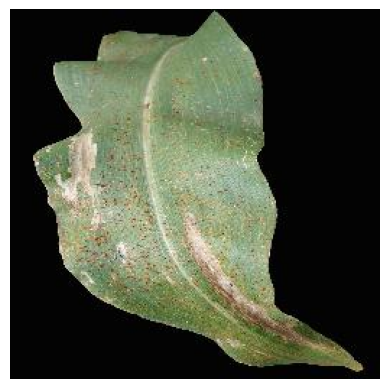

' when training a model the image size have to be uniform that 256 by 256 \nas-is in the below image  \n'

In [24]:
# Using an image file
image_path = '/content/plantvillage dataset/color/Corn_(maize)___Common_rust_/RS_Rust 1563.JPG'

#Read the image
img = mpimg.imread(image_path)
print(img.shape) # to check the shape of the image

# Plot the image
plt.imshow(img)
plt.axis('off') # to hide axis numbers (not needed for image display)
plt.show()

""" when training a model the image size have to be uniform that is 256 by 256
as-is in the below image. The 3 stands for rgb color - red, green and blue
"""

In [28]:
# Image Parameters, we will resize the image to 224, this size is large enough to capture all the image features and also helps to reduce memory usage
img_size = 224
batch_size = 32

## Train Test Split

In [25]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2 # we are using 20% of data for validation and 80% for training
)

In [29]:
# Train Generator
train_gen = data_gen.flow_from_directory(
    main_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [30]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    main_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.
